# Two lectures on quasar lensing and microlensing

R. W. Schmidt

Astronomisches Rechen-Institut, Zentrum für Astronomie der Universität Heidelberg,
Mönchhofstrasse 12-14,
D-69120 Heidelberg,
Germany

Email: rschmidt@uni-heidelberg.de

## Abstract

This contribution is a summary of two lectures I gave at the Jena meeting in September 2019. The topic of the first lecture was quasar lensing, the topic of the second was Microlensing. This text thus features a collection of topics from quasar lensing and planetary microlensing. My goal was to choose rather the intuitive than the mathematically rigorous explanation. For some of the diagrams I include the python code to generate them. All programs contained in this article are free software: you can redistribute them and/or modify them under the terms of the GNU General Public License as published by the Free Software Foundation.

## 1. Quasars and quasar lensing


### 1.1 The quasar engine

According to the current understanding, quasars are the bright centres
of galaxies. The large fluxes from these pointlike sources can be
detected up to high redshift. This led people in the 80s to construct
models where the gravitational energy of material in a disc
surrounding a supermassive black hole is radiated away as
electromagnetic radiation. The potential energy released by the
accretion of a particle of mass $m$ down to the surface of a body of mass
$M$ and radius $R$ is 

$$\Delta E_{acc}= G M m / R~~  (1)$$

Working this out for a neutron star with a radius $R\approx 10$km and
$M\approx M_{sun}$ yields

$$\frac{\Delta E_{acc}}{m} \approx 10^{16} J/kg~~(2) $$

Frank, King  & Raine (2002) show that this value is larger than the yield for
nuclear fusion ($\Delta E_{fusion}/m \approx 0.007 c^2 \approx 6\times
10^{14} J/kg$). They stress that for black holes this calculation is
more complicated because there is no surface and find $\approx 0.06
c^2$ using the correct general-relativistic treatment.

[Shakura & Sunyaev (1973)](https://ui.adsabs.harvard.edu/abs/1973A%26A....24..337S/abstract)
showed that it is possible to construct a simple
thin-disc model of the viscous material in the accretion disc that is
inspiraling and radiates away the liberated
energy. At the same time, there is also a transport of angular
momentum outwards. The luminosity emitted by a Shakura-Sunyaev disc
is

$$L=\frac{G \dot{m} M}{2 R} = \frac{1}{2} L_{acc}~~ (3)$$

where the $L_{acc}$ is the accreting potential energy of the disc.

Modelling the emission using black-body radiation leads to the relation
that the closer one gets to the central object the more the maximum of
the emission moves to shorter wavelengths:

$$r_{\lambda} \propto \lambda^{4/3}~~ (4)$$

One can also express this using the temperatures $T$: 

$$T=T_\lambda \left(\frac{r}{r_\lambda}\right)^{-3/4} ~~ (5)$$

($T_\lambda = (3 G M \dot{m}/ 8 \pi r_\lambda^3 \sigma)^{1/4}$,
$\sigma$=Stefan-Boltzmann constant).
With $R\approx 10^4 km$, $\dot{m}\approx 10^{16} g/s$ and $M\approx M_{sun}$ we find
for UV radiation $T_\lambda\approx 4\times10^4$ K . When reducing the radius by a factor
$\sim 10^4$, the temperature will increase by factor 1000.

The (black-body) luminosity emitted at a particular radius should only depend on the temperature $T$, but is also proportional to the mass accretion rate: $L\propto \dot{m}$. Considering the Eddington luminosity at which the radiation would completely halt spherical accretion, 

$$L_{edd}= 4 \pi G M m_p c/\sigma_T,~~(6)$$

($m_p$: proton mass, $\sigma_T$: Thompson cross section)
a black hole mass-radius-luminosity relation can be derived (e.g., [Kochanek 2004](https://ui.adsabs.harvard.edu/abs/2004ApJ...605...58K/abstract)):

$$M \propto r_\lambda^{3/2} ~(L/L_{edd})^{-1/2}.~~(7)$$

__To keep in mind__:
The relations governing the accretion disk are testable using quasar lensing, especially *quasar microlensing*.

* We need to show that the emission region has different sizes $r_\lambda$ for emission at different wavelengths (equation 4).

* Furthermore, this radius $r_\lambda$ should obey relation (7) when the luminosity (assuming, e.g., Eddington luminosity) or the black hole mass can be measured.

We shall see that there is evidence for both relations in the data.

<img src="figures/agn.png" width=500px alt="AGN picture">

###### Fig.1 : Artistic impression of the accretion disc surrounding a black   hole.  Perpendicular to the disc, emerging jets are   illustrated. Image credit: NASA/CXC/SAO.

### 1.2 Multiple imaging of quasars

In a gravitational lens situation, light rays from the source are
deflected by a massive object close to the line-of-sight. Very close
to the deflection mass (or even inside the deflecting mass for transparent/extended
lenses such as galaxies), the source can be imaged multiple times. 
This effect is called __strong lensing__ and occurs once
the source crosses an imaginary line called the caustic.

In Figure 2 (code cell 1) it is shown how the images of a background object can be constructed using the lens equation

$$\beta = \theta - \frac{d_{ds}}{d_d} \hat{\alpha}  ~~ (8) $$

with the quantities (angles with respect to the lens centre)

$\theta$: image position

$\hat{\alpha}$: deflection angle, often it is  defined: $\alpha = \frac{d_{ds}}{d_d} \hat{\alpha}$

$\beta$: source position

$d_s$: (angular diameter) distance observer -- source

$d_{ds}$: (angular diameter) distance lens -- source

In the case depicted in Fig. 2, the deflection angle is constant (a so-called isothermal sphere). There are three aspects relevant for observations:

* __Image multiplicity__: If the source is inside the region marked by the blue lines, two images can be observed (with the exception of the special symmetrical case where observer, lens and source are aligned).

* __Magnification__: In the figure, only the radial extent of the source is shown, where no magnification occurs for this lens because of the constant deflection angle:
$$\mu_r = \frac{d \theta}{d \beta}=1 ~~ (9).$$
The magnification in the tangential direction is proportional to the ratio of image position and source position, relative to the centre of the lens:
$$\mu_t = \frac{\theta}{\beta} ~~ (10).$$

* __Parity__: The image further away from the lens is imaged without parity change ('R'), but the inner image is mirror-inverted ('Я') because the light rays connect to the source via the other side of the lens.


([], <a list of 0 Text xticklabel objects>)

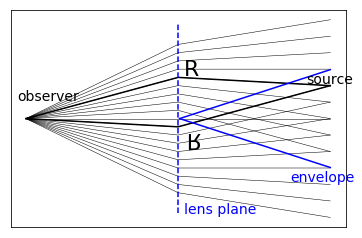

In [4]:
# code cell 1
# python code to produce Figure 2
# R. W. Schmidt (2020)

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

def beta(theta):      # lens equation
    if theta>0:
        beta=theta-alpha_hat*dds/ds
    elif (theta<0):
        beta=theta+alpha_hat*dds/ds
    else:
        beta=0
    return beta

alpha_hat=np.deg2rad(30)   # deflection angle
image1=np.deg2rad(25)  # image positions
image2=np.deg2rad(-5)

dd=0.5
ds=1.0
dds=ds-dd

d=np.linspace(0,ds,100)
d1=d[d<dd]
d2=d[d>dd]

plane=np.linspace(-0.5,0.5,100)
envelope = alpha_hat*d1

# plotting
for image in np.linspace(-1.5*alpha_hat,1.5*alpha_hat,19):             # ray tracing
    plt.plot([0.0,dd,ds],[0.0,dd*image,ds*beta(image)],'black',linewidth=0.5)
plt.plot([0.0,dd,ds],[0.0,dd*image1,ds*beta(image1)],'black')  # rays to source
plt.plot([0.0,dd,ds],[0.0,dd*image2,ds*beta(image2)],'black')
plt.plot(d2,envelope,'blue',d2,-envelope,'blue')               # envelope
plt.plot(0.5*np.ones(100),plane,'b--')                         # lens plane 
plt.text(0.52, -0.5, 'lens plane', color='blue',fontsize=14)   # labels
plt.text(0.87,-0.33,'envelope',color='blue',fontsize=14)
plt.text(0.92,0.19,'source',fontsize=14)
plt.text(-0.03,0.1,'observer',fontsize=14)
plt.text(0.52,0.23,'R',fontsize=22,rotation=0)                 # parity indicator
plt.text(0.52,-0.13,'Я',fontsize=22,rotation=180)
plt.yticks([])
plt.xticks([])

###### Fig. 2: Illustration for the construction of the images of a spherically symmetric lens with constant deflection angle. For various positions in the lens plane, light rays rays are traced towards the source plane (thin lines). The source can be observed doubly imaged on the sky as indicated by the thick lines. The envelope (blue lines) indicates the volume within which multiple images can occur (thin lines crossing). The letters ('R') indicate the parity of the images: The outer image is observed with parity conserved, but the inner image is mirror-inversed. This can be seen by considering source points above or below the plane shown in the figure.

The first gravitationally lensed quasar to be discovered was the double quasar Q0957+561
by [Walsh et al. (1979)](https://ui.adsabs.harvard.edu/abs/1979Natur.279..381W/abstract). In this case the source redshift was shown to be z=1.41. The lens redshift is z=0.36, the image separation of the two quasar images is about 6.1 arcsec. Using VLBI data, [Gorenstein et al. (1988)](https://ui.adsabs.harvard.edu/abs/1988ApJ...334...42G/abstract) showed that the quasar source is a radio source with a jet, and that the two jet images are mirror images, as predicted by theory.

In the case of a perturbed lens two more images can be observed, if the source is situated close enough to the lens centre (in projection). Perturbed models are for example elliptical potentials or elliptical mass distributions. A simple example is shown in Figure 3 (code cell 2) for the case of a circular lens with external shear, using formulae from Kochanek (2006). The lens equation in this case is (now with vectors because the problem is not one-dimensional as the circularly symmetric case above):

$$\vec{\beta} = \begin{pmatrix}  1- \gamma & 0\\0 & 1 + \gamma \end{pmatrix}
\vec{\theta} - b \frac{\vec{\theta}}{|\theta|} ~~(11).
$$

where $\gamma$ is the external shear. $b$ is the (constant) lens deflection angle.

This model highlights many aspects relevant in quasar lensing:

* __Image positions and multiplicity__ depend on the location of the source in the source plane. There are typically two ("double") or four ("quad") images observed. The possible fifth central image is in most cases so strongly demagnified that it cannot be observed.

* The observed relative __brightness__ of the quasar images follows from the magnifications because surface brightness is conserved in gravitational lensing.

* The __parity__ can be seen from the spiral shape. Neighbouring sources are of opposite parity.

* __Critical curve and caustics__: The red lines in Fig. 3 denote the caustic lines in the source plane, and the critical curve in the lens plane. The caustic is the locus of the critical curve mapped (by the deflection formula) into the source plane. At the critical curve the determinant of the Jacobian matrix vanishes:
$det \frac{\partial\vec{\beta}}{\partial \vec{\theta}}= 0$,
which means that the magnification on the caustic is formally infinite (for point sources). The caustic lines are at the intersection of the envelope (blue lines) illustrated in Fig. 2 with the source plane.
Caustic lines of infinite magnification in the source plane separate region of image multiplicity. When the source touches the caustic, the images appear to merge across the crictical lines in the image plane. Normally the new images appear in pairs (e.g., the spirals in Fig. 3). In Fig. 2 only one additional image is seen because the deflection angle changes sign abruptly at the centre for this model. That is why in this special case the additional image appears near the centre when the source crosses the caustic.


Fig. 3 can be compared to collections images of quasar lenses, such as compiled in the [CASTLES survey](https://www.cfa.harvard.edu/castles/) or in the recent paper by [Shajib et al. (2019)](https://ui.adsabs.harvard.edu/abs/2019MNRAS.483.5649S/abstract). The different image formations such as "cross" (blue images), "fold arc" (two green images merging) or "cusp arc" (three close orange images merging) can be readily identified (notice also the fainter opposite image in the cusp case). Shajib et al (2019) have modelled a sample of *>20* quasar lenses. They find that the mass halos (including dark matter) align with the light. 
The flux ratios, however, differ from the magnification predictions of simple models.

A recent example with extremely high resolution to study the image parity in quasar lensing is the VLBI image of the quadruply imaged quasar MG J0751+2716 (z=3.2) by [Spingola et al. (2018)](https://ui.adsabs.harvard.edu/abs/2018MNRAS.478.4816S/abstract) (their Fig. 1). When comparing this figure with our Fig. 3 (green spiral) one can directly verify and compare the predicted parity inversion of the images.
Spingola et al. (2018) determined the positions of images and features with a precision of 0.04 mas that cannot be explained fully by their lensing model. They suggest that this can be explained by substructure in the line-of-sight or the group halo.


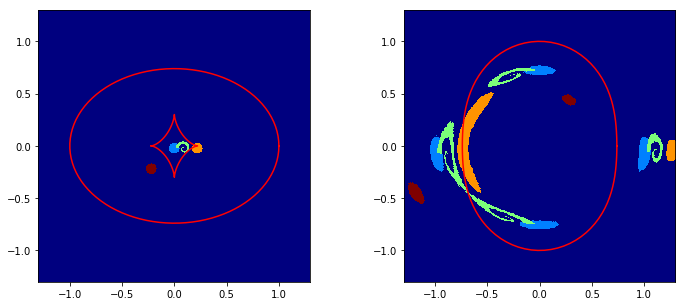

In [8]:
# code cell 2
# python code to produce figure 3
# formulae for lens equation, critical curve and caustics from Kochanek (2006) pages 113-114
# R. W. Schmidt (2020)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# lens equation
def deflect_ray(theta_1,theta_2):
    theta=np.sqrt(theta_1**2+theta_2**2)
    return theta_1*(1-gamma)-b*theta_1/theta,theta_2*(1+gamma)-b*theta_2/theta

b=0.85      # deflection angle
gamma=0.15  # external shear
step=0.005
window=1.3
source_size=0.05
rays = np.arange(-window, window, step)
xx, yy = np.meshgrid(rays, rays)
nray=len(rays)

#arrangement for spiral source: phi/radius=const
phi=np.arctan2(yy+0.025,xx-0.09)
rr=np.sqrt((xx-0.09)**2+(yy+0.025)**2)
spiral_1=phi/(2*rr)
spiral_2=(phi+2*np.pi)/(2*rr)

#source plane with four sources
source_plane=np.zeros([nray,nray])
source_plane[xx**2+(yy+0.025)**2<source_size**2]=1
source_plane[((spiral_1<100) & (spiral_1>60))]=2
source_plane[((spiral_2<100) & (spiral_2>60))]=2
source_plane[(xx-0.22)**2+(yy+0.025)**2<source_size**2]=3
source_plane[(xx+0.22)**2+(yy+0.22)**2<source_size**2]=4

# construct image plane from rays to source plane
image_plane=np.zeros([nray,nray])
for nx in range(nray):
    for ny in range(nray):
        u,v=deflect_ray(xx[ny,nx],yy[ny,nx])
        image_plane[ny,nx]=source_plane[int((v+window)//step),int((u+window)//step)]

#plotting sources and caustics/critical lines
beta_plus=2*b*gamma/(1+gamma)
beta_minus=2*b*gamma/(1-gamma)
phi=np.linspace(0,2*np.pi,100)
tangential_caustic_x=-beta_plus*np.cos(phi)**3
tangential_caustic_y= beta_minus*np.sin(phi)**3
radial_caustic_x=b*np.cos(phi)/(1-gamma)
radial_caustic_y=b*np.sin(phi)/(1+gamma)
critical_curve=b*(1-gamma*np.cos(2*phi))/(1-gamma**2)

figure = plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.imshow(source_plane,extent=[-window,window,-window,window],origin='lower', cmap=plt.cm.jet)
plt.plot(tangential_caustic_x,tangential_caustic_y,'red')
plt.plot(radial_caustic_x,radial_caustic_y,'red')

plt.subplot(1,2,2)
plt.imshow(image_plane,extent=[-window,window,-window,window],origin='lower', cmap=plt.cm.jet)
plt.plot(critical_curve*np.cos(phi),critical_curve*np.sin(phi),'red')


###### Fig. 3: (left panel) Four sources (one is spiral) are depicted in the source plane. The red lines are the "tangential" caustic (inside) and the "radial" caustic (outside) for a circular lens with external shear. (right panel) The images of the four sources in the left panel are depicted. The red line is the tangential critical curve (image of the tangential caustic). The strength of the lens deflection compared to the axis scale is given by the constant deflection angle b=0.85. Note the different shapes of the individual sources. Once the source crosses the asteroid caustic, pairs of images appear or disappear. In the case of the orange source, three images are merged into one arc. In the case of the green source, a merging pair of images can be seen. All these image configurations are observed in multiply imaged quasars or galaxy cluster lenses. The source outside the tangential caustic, but inside the radial caustic, has two images. From the spiral source it can be seen that the left and the right images conserve parity, but the top and the bottom images are mirror-inverted.

### 1.3 Time-delays and the Hubble constant

In cases where the source is variable (e.g., in quasars) the relative time-delay as a function of lens-plane position becomes important. This consists of a geometrical delay (first term in square brackets) and the Shapiro- or gravitational delay (second term).

$$ t(\vec{\theta}) = T_0 \left[ \frac{1}{2} \left( \vec{\theta}-\vec{\beta} \right)^2 - \psi(\vec{\theta}) \right] ~~(12)$$

with $\vec{\beta}$ for a particular source, angles in radians and

$$T_0 = \frac{1+z_d}{c} \frac{d_d d_s}{d_{ds}}.~~(13)$$

For $z_d=0.3$, $z_s=1.7$, and standard LCDM cosmology this becomes

$$T_0= 44.8\,days\, \left(\frac{H_0}{70 km/s/Mpc}\right). ~~(14)$$

The quantity $\psi (\vec{\theta})$ in eq. (12) is proportional to the Newton potential integrated along the line-of-sight. It is called the lensing potential, from which the deflection angle can be calculated:

$$\vec{\alpha} = \vec{\nabla} \psi. ~~(15)$$

In the same way that the Newton-potential satifies the Poisson equation, the lensing potential satifies a two-dimensional Poisson equation

$$\Delta \psi = \frac{8 \pi G}{c^2} \frac{d_d d_{ds}}{d_s} ~ \Sigma~,~~(16)$$

where $\Sigma$ is the surface mass density.
Fermat's principle states that the light travel times at the images should be extrema, i.e. minima, maxima or saddle points. This can be seen from (11a) since

$$\vec{\nabla} t = T_0 \left[ (\vec{\theta} - \vec{\beta})   - \vec{\alpha} \right] = 0 ~~(17)$$

because of the lens equation (8). The time-delay surface $t(\vec{\theta})$ for the potential from Fig.3 is shown in Fig. 4 (code cell 3) for the centre of the spiral source $\vec{\beta}=(0.09,-0.025)$. It can be seen that the images with __negative parity__ correspond to the __saddle point images__. For a variable light curve of the source time-delays of the order of a few days are predicted in this model between the images.

Text(1.15, -0.1, 'C')

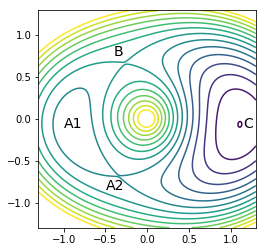

In [1]:
# code cell 3
# python code to produce figure 4
# R. W. Schmidt (2020)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

b=0.85      # deflection angle
gamma=0.15  # external shear
step=0.005
window=1.3
rays = np.arange(-window, window, step)
xx, yy = np.meshgrid(rays, rays)
xx, yy = np.meshgrid(rays, rays)
rr = np.sqrt(xx*xx+yy*yy)

# formulae for geometrical and gravitational (Shapiro) delay
geometrical = 0.5*((xx-0.09)**2+(yy+0.025)**2)
gravitational=0.5 * gamma * (xx**2-yy**2)  + b * rr

# lensing potential
potential = geometrical - gravitational

# plotting of the time-delay contours
plt.axes().set_aspect('equal')
levels=-0.516+np.arange(0,0.45,0.0338)   # spacing corresponds to 1.5 days for zd=0.3, zs=1.7
contour_set = plt.contour(xx, yy, potential,levels=levels)
plt.text(-1,-0.1,'A1',fontsize=14)
plt.text(-0.5,-0.85,'A2',fontsize=14)
plt.text(-0.4,0.75,'B',fontsize=14)
plt.text(1.15,-0.1,'C',fontsize=14)

###### Figure 4: Contours of the time-delay function $t(\vec{\theta)}$ are shown for a point source at $\vec{\beta}=(0.09,-0.025)$. The image locations are indicated by the letters. A1 and C are situated in minima of the time-delay surface. B and A2 are located at saddle points. The spacing of the contours corresponds to 1.5 days under the following assumptions: axis scale = arcseconds, lens redshift $z_d=0.3$, source redshift $z_s=1.7$ , $H_0=70 km/s/Mpc$, standard LCDM cosmology.

[Refsdal (1964)](https://ui.adsabs.harvard.edu/abs/1964MNRAS.128..307R/abstract) noted that the time-delays between individual images depend on the Hubble constant $H_0$ (see eq. 14). For a smaller/larger universe (i.e. larger/smaller $H_0$), the time-delays scale with the size of the universe/the Hubble constant. Refsdal suggested to use supernovae to carry out this test. In fact, lensing time-delays have now been observed for distant supernovae ([Rodney et al. 2016](https://ui.adsabs.harvard.edu/abs/2016ApJ...820...50R/abstract), [Kelly et al. 2016](https://ui.adsabs.harvard.edu/abs/2016ApJ...819L...8K/abstract)).

The first time-delays were measured with gravitationally lensed quasars. A prime example is the double quasar Q0957+561 ([Walsh et al. 1979](https://ui.adsabs.harvard.edu/abs/1979Natur.279..381W/abstract)). Since the time-delay is longer than one year, it took some time before consensus was reached as to its value (e.g.,  [Schild 1990](https://ui.adsabs.harvard.edu/abs/1990AJ....100.1771S/abstract), [Press, Rybicki, Hewitt 1992](https://ui.adsabs.harvard.edu/abs/1992ApJ...385..404P/abstract)). But [Kundic et al. (1997)](https://ui.adsabs.harvard.edu/abs/1997ApJ...482...75K/abstract) detected a clear $\approx 0.1~mag$ brightness drop in one component, which they then recovered in the other image with a time-delay of $\Delta t=418\pm3~days$. They obtained a value for the Hubble constant $H=64\pm13~km/s/Mpc$.

It should be stressed that finding time-delays in multiple imaged quasar light curves is not easy. Features in the intrinsic variations of quasars (typically of the order of $0.1~mag$, but sometimes stronger) have to be identified by algorithms between two (or more, in the case of, e.g., quadruple systems) light curves. These light curves have gaps due to the earth's orbit around the sun, and other gaps introduced when observations are not possible at the telescopes. Furthermore, the brightness of the lensed images differs, as the magnification is not constant due to sub-structure in the lens plane (next section). The brightness affects the photon noise, which needs to be taken into account. Many different, often very sophisticated, techniques have been developed to determine time-delays in the presence of non-continuous, noisy data (e.g., [incomplete list] [Schild 1990](https://ui.adsabs.harvard.edu/abs/1990AJ....100.1771S/abstract), [Press, Rybicki, Hewitt 1992](https://ui.adsabs.harvard.edu/abs/1992ApJ...385..404P/abstract), [Pelt et al. 1996](https://ui.adsabs.harvard.edu/abs/1996A%26A...305...97P/abstract), [Kundic et al. 1997](https://ui.adsabs.harvard.edu/abs/1997ApJ...482...75K/abstract), [Haarsma et al. 1997](https://ui.adsabs.harvard.edu/abs/1997ApJ...479..102H/abstract), [Tewes et al. 2013](https://ui.adsabs.harvard.edu/abs/2013A%26A...556A..22T/abstract)). 

By now, more than 15 systems with measured time-delays are known (see the [CASTLES survey](https://www.cfa.harvard.edu/castles/)). These systems provide fascinating evidence for the interpretation that the lensed components indeed are images of the same variable background source. There is a lively debate in the literature regarding the precision on $H_0$ obtainable with these measurements that is well worth studying (e.g., [Wong et al. 2019](https://ui.adsabs.harvard.edu/abs/2019arXiv190704869W/abstract), [Kochanek 2019](https://ui.adsabs.harvard.edu/abs/2019arXiv191105083K/abstract)). In a recent paper [Taubenberger et al. (2019)](https://ui.adsabs.harvard.edu/abs/2019A%26A...628L...7T/abstract) measure the Hubble constant $H_0=72.9\pm2.4~km/s/Mpc$ using the image positions and time-delays in __four__ multiply imaged quasars (three quads and one double) with only very wide priors on the matter density and the cosmological constant.

A particularly large and interesting example of a multiply imaged quasar with known time-delays is the system SDSS1004+4112 (Fig. 5, [Inada et al. 2003](https://ui.adsabs.harvard.edu/abs/2003Natur.426..810I/abstract), [Fohlmeister et al. 2007](https://ui.adsabs.harvard.edu/abs/2007ApJ...662...62F/abstract), [2008](https://ui.adsabs.harvard.edu/abs/2008ApJ...676..761F/abstract)). The four quasar images ($z_s=1.73$) are observed around the central region of a galaxy cluster at $z_d=0.68$. The images are grouped into a pair (a "fold-pair" similar to the green spiral in to Fig. 3) and two further separate sources. Fohlmeister et al. (2008) measured the time-delays between the images AB ($\Delta t=41\pm 2~days$), CA ($\Delta t=822\pm 2~days$). The delay DA is larger than $\Delta t>1250~days$ because no overlap has yet been reported in the data. [The leading images are listed first.]




###### ![SDS1004+4112](figures/sdss1004_label.png)  Fig.5 : SDSS1004+4112 as observed by the Hubble Space Telescope with the ACS instrument. Image credit: European Space Agency, NASA, Keren Sharon (Tel-Aviv University) and Eran Ofek (CalTech). The centre of the image was cut out and labelled. [Link to the original](https://sci.esa.int/web/hubble/-/39286-galaxy-cluster-sdss-j1004-4112-and-lensed-quasar). See also Fig. 8.

### 1.4 Quasar microlensing

The lensing of quasars discussed in the previous sections is also called macro-lensing. When we consider the effect of compact masses along the line-of-sight to a quasar, we are entering the "micro-lensing" regime.


#### 1.4.1 Lensing by point masses


The deflection for a point mass can be calculated from Einstein's deflection angle for a point mass at a distance $r$:

$$\hat{\alpha} = \frac{4 G M}{c^2 r}.~~(18)$$

We write the lens equation (8) as

$$\beta = \theta - \frac{\theta_E^2}{\theta} ~~(19)$$

with the so-called Einstein radius

$$\theta_E = \sqrt{ \frac{4 G M}{c^2} \frac{d_{ds}}{d_d d_s}}. ~~(20)$$

Let us estimate $\theta_E$ using $d_{ds}/d_s \approx 0.5$ (see also code cell 4):

(1) Galactic microlensing; a solar mass lens and a source in the Milky Way $d_s=8 kpc$: $\theta_E=0.7 mas$

(2) Cosmological microlensing; a solar mass lens and a source at cosmological distance $d_s=0.5 Gpc$: $\theta_E=2.9 \mu arcsec.$

Deflection angles of the order of micro-arcseconds at cosmological distances partially gave the effect its name: "micro"-lensing (besides the fact that it is caused by the graininess ["micro-structure"] of the lens galaxy).

In [2]:
# code cell 4
# python code to calculate deflection angles
# R.W. Schmidt 2020

import math as m

def Einstein_radius(dd):  # dd in pc
    alpha_hat = m.sqrt((4*G*MSUN/(C**2))*dds_over_ds/(dd*PC))
    return alpha_hat/MAS

G=6.67e-11
C=3e8
MSUN=2e30
PC=3.0856e16       # parsec
MAS=1e-3*4.848e-6  # milli-arcsec
dds_over_ds = 0.5  # assuming dds/ds=0.5

print ('Einstein radius at   8 kpc: {0:4.2f} mas'.format(Einstein_radius(8000)))
print ('Einstein radius at 0.5 Gpc: {0:6.4f} mas'.format(Einstein_radius(500e6)))


Einstein radius at   8 kpc: 0.71 mas
Einstein radius at 0.5 Gpc: 0.0029 mas


#### 1.4.2 Lensing by an ensemble of point masses

In the case of quasar lensing there are at least two components to the lensing effect: (1) macro-lensing by the lensing galaxy is responsible for the multiple images with angular separations of arcseconds. (2) micro-lensing by coarse-grained structure of the lensing galaxy, which consists of stars and other compact objects close to the line-of-sight to the quasar. 

We calculate now the lensing effect of the compact objects in the vicinity of the light path to the quasar. We subtract the light deflection due to the macro-model, which leaves us with the coarse-grained deflection due to the local distribution of objects. These objects have a local density $\Sigma_{*}$. We will denote the average density inside a radius $\theta$ as $\Sigma_{*}(<\theta)$. In addition, there is a tidal field of the lensing galaxy. Similar to the model for the lensing galaxy used above, we model this using an external shear term. It is customary also to add a potential smooth matter distribution (e.g., a distribution of elementary particles). The smooth matter distribution is modelled by the surface mass density $\Sigma_c$. Both surface mass densities can be expressed in terms of the so-called critical mass density

$$\Sigma_{crit}=c^2 d_s/(4 \pi G d_d d_{ds}):~~(21)$$

$\kappa_{*}=\Sigma_{*}/\Sigma_{crit}$ and $\kappa_c= \Sigma_c/\Sigma_{crit}$. The sum of both $\kappa$-terms is called _convergence_ $\kappa = \kappa_{*}+\kappa_c$.  The lens equation for the local lens mapping is

$$\vec{\beta} =  \begin{pmatrix}  1- \kappa_c - \gamma & 0\\0 & 1 - \kappa_c + \gamma \end{pmatrix} \vec{\theta}
- \sum_{i} \frac{\theta^2_{E,i}}{|\vec{\theta}-\vec{\theta}_i|^2} (\vec{\theta}-\vec{\theta}_i)~~(22)$$

where the sum is taken over all objects $i$.

In order to see why the $\kappa_c$ appears normalized in the matrix, we consider the last term of equation (22) in the limit of a homogeneous circular mass distribution. In this case the masses in annuli within $\vec{\theta}$ can be thought to be located in the center (Newton's theorem), so that only the mass needs to be added:

$$\sum_i \frac{\theta_{E,i}^2}{\theta^2} ~ \vec{\theta}
= \frac{\sum M_i }{\pi (d_d \theta)^2 } \left(\frac{c^2}{4 \pi G} \frac{d_s}{d_d d_{ds}} \right)^{-1}   \vec{\theta}
=  \Sigma_{*}(<\theta) \cdot \frac{1}{\Sigma_{crit}} \cdot \vec{\theta} =: \kappa_{*}~ \vec{\theta}~~ (23)$$

with $\kappa_{*}=\Sigma_{*}(<\theta)/\Sigma_{crit}$. Comparison of the first and the last parts in equation (23) shows that for small $\kappa_{*}$ it can be interpreted as the fraction of the image plane covered by Einstein circles: $\kappa_{*} = (\sum_i \pi \theta_{E,i}^2)/(\pi \theta^2)$ (for large $\kappa_{*}$ the circles will have an overlap).

In the following code cell 5, some critical densities are calculated.

In [30]:
# code cell 5
# python code to calculate the critical density
# R.W. Schmidt 2020

import math as m

def sigma_crit(dd):   # dd in pc
    sigma_crit=C**2/(4*m.pi*G*dd*PC*dds_over_ds)
    return sigma_crit

G=6.67e-11
C=3e8
PC=3.0856e16        # parsec
dds_over_ds = 0.5   # assuming d_ds/d_s = 0.5

dd=[10e3,500e6,1e9] # in pc
for x in dd:
    print ('critical density at d_d= {0:5.0e} Mpc: {1:6.0f} kg/m^2'.format(x/1e6,sigma_crit(x)))

critical density at d_d= 1e-02 Mpc: 695981 kg/m^2
critical density at d_d= 5e+02 Mpc:     14 kg/m^2
critical density at d_d= 1e+03 Mpc:      7 kg/m^2


#### 1.4.3 Quasar microlensing simulations

After the discovery of the double quasar Q0957+561, [Chang & Refsdal (1979)](https://ui.adsabs.harvard.edu/abs/1979Natur.282..561C/abstract) suggested that in the case of a multiply imaged quasar, a time-variable magnification due to microlensing by compact objects should affect the brightness of the source.

As an example, we can compare the mass density in the Milky way disk with typical critical densities listed in code cell 5. [Kuijken & Gilmore 1989](https://ui.adsabs.harvard.edu/abs/1989MNRAS.239..571K/abstract) find for the local surface mass density (near the sun) $\Sigma\approx 46 M_{sun}/pc^2 \approx 100 g/m^2$. This would be too low.

The average surface mass density inside the Einstein radius of a quasar lens, however, has to be the critical density for lensing to occur ($\alpha = \theta$ in equation 23). Therefore, the surface mass densities at the position of the quasar images are typically $\kappa\approx 0.1$ or even higher (e.g., for symmetric configurations like the blue source in Fig. 3).

__Simulations:__ Several methods have been used to simulate quasar microlensing light curves:

(1) Inverse ray-shooting traces many light rays from the observer via the lens equation to the source plane. By collecting rays in pixels in the source plane, the magnification of individual source plane positions is calculated.

(2) Light curves are determined by calculating the image of a line or a strip in the source plane.

(3) Solving the Poisson equation (16) using a Fourier transformation of the $\kappa$-map.

There is now a long history of code to deal with this problem. I am not claiming completeness, but will list the following references as a guide: [Young 1981](https://ui.adsabs.harvard.edu/abs/1981ApJ...244..756Y/abstract), [Paczynski 1986](https://ui.adsabs.harvard.edu/abs/1986ApJ...301..503P/abstract), [Kayser et al. 1986](http://articles.adsabs.harvard.edu/full/1986A%26A...166...36K), [Wambsganss et al. 1990](https://ui.adsabs.harvard.edu/abs/1990ApJ...352..407W/abstract), [Witt 1993](https://ui.adsabs.harvard.edu/abs/1993ApJ...403..530W/abstract), [Lewis et al. 1993](https://ui.adsabs.harvard.edu/abs/1993MNRAS.261..647L/abstract), [Witt & Mao 1994](https://ui.adsabs.harvard.edu/abs/1994ApJ...429...66W/abstract), [Wyithe & Webster 1999](https://ui.adsabs.harvard.edu/abs/1999MNRAS.306..223W/abstract), [Kochanek 2004](https://ui.adsabs.harvard.edu/abs/2004ApJ...605...58K/abstract), [Mediavilla et al. 2006](https://ui.adsabs.harvard.edu/abs/2006ApJ...653..942M/abstract), [Garsden & Lewis 2010](https://ui.adsabs.harvard.edu/abs/2010NewA...15..181G/abstract), [Thompson et al. 2010](https://ui.adsabs.harvard.edu/abs/2010NewA...15...16T/abstract), [Vernardos et al. 2015](https://ui.adsabs.harvard.edu/abs/2015ApJS..217...23V/abstract), [Alpay 2018](https://github.com/illuhad/teralens).

In Fig. 6 the magnification pattern in the source plane is illustrated with $\kappa_{*}=0.59$, $\kappa_c=0$ and $\gamma=0.61$. Also shown are the magnification curves (called light curves) for three different source sizes of 0.01 Einstein radii, 0.04 Einstein radii and 0.1 Einstein radii. The source shape used here for this profile is the so-called think-disk model

$$f(\theta) \propto \frac{1}{e^{(\theta/\sigma)^{3/4}}-1}  ~~ (24)$$

with source size $\sigma$, which is a reasonable far-field approximation of the Shakura & Sunyaev model discussed in Sect 1.1 (see [Kochanek 2004](https://ui.adsabs.harvard.edu/abs/2004ApJ...605...58K/abstract), Frank et al. 2002).

<img src="figures/microlensing.jpg" width=1000px alt="Microlensing01">

###### Figure 6: (top) Microlensing magnification pattern in the source plane with $\kappa_{*}=0.59$, $\kappa_c=0$ and $\gamma=0.61$. The white line is the track of the quasar through the pattern. (bottom) Light curves of  themagnitude-change due to microlensing for three different source sizes 0.01 Einstein radii, 0.04 Einstein radii and 0.1 Einstein radii. The source shape used here for this profile is the so-called think-disk model, equation (24). 100 units on the x-axis is one Einstein radius.

From the magnification pattern shown in Fig. 6 and the associated light curves two main spatial/time scales in a quasar microlensing situation can be determined:

1. The Einstein radius determines the overall density of objects and thus the (approximate) density of caustic lines. Dividing the Einstein radius by the velocity of the object through the pattern leads to a time-scale corresponding to the Einstein radius.
In code cell 4 we work out the Einstein radius for a solar mass object at $d_d=0.5 Gpc$ to be $2.9 \mu arcsec$.
This corresponds to a size of $r_e=\theta_E d_d = 1450 AU$. If we also assume a (projected) transverse velocity of the
quasar through the magnification pattern of $v\approx 100 km/s$, the time-scale is $t_E=r_e/v\approx 69 yr$.

2. Source size: The width of the microlensing light during the crossing of a caustic is given by the source size (e.g. [Chang & Refsdal 1984](https://ui.adsabs.harvard.edu/abs/1984A%26A...132..168C/abstract)). For a size of $r\approx 10^{14}~cm$ and $v\approx 100 km/s$ the time-scale is $t_{source}=0.3 yr$.

It should be stressed that the transverse velocity is not well constrained from other observables. $t_E$ or $t_{source}$ are inverse proportional to the velocity.

#### 1.4.4 Quasar properties from microlensing

The previous section has shown that microlensing depends not only on lens plane properties, such as $\kappa_{*}$ vs $\kappa_c$ and the mass spectrum of compact objects, but importantly also on the luminosity profile/shape of the quasar engine. In Section 1 we discussed that in the thin disc model the source size depends on the wavelength $\lambda$ of the emitted radiation accordig to $r_{\lambda} \propto \lambda^{4/3}$ (equation 4).

In order to study quasar microlensing, the intrinsic variability of quasars needs to be factored out. Moreover, given the time-delays (section 1.3) between the images, quasars need to be monitored over long times. Once the time-delay has been established, light curves can be compared at the same intrinsic epoch. 

Given a sufficiently long and well-sampled set of fluxes $f_{1j}$ and $f_{2j}$ for two images $1$ and $2$ measured at times $t_{j}$, one image flux can be interpolated to the times $t_j'=t_j+\Delta t_{12}$ to yield interpolated measurements $f_{2j'}$. The intrinsic variations can then be removed by dividing the respective fluxes :

$$flux~ratio(t_j) = \frac{f_{1j}}{f_{2j'}}~~(25)$$

(if magnitudes are used instead of fluxes, the magnitudes would need to be subtracted). We are left with the variable magnification due to the microlensing effect.

It should be said that this may sound easier than it is. As mentioned in Section 1.3 on time-delays, the observed light curves often have gaps and are not evenly sampled. There have been various techniques invented to either reconstruct microlensing light curves or to model them (e.g., [Schmidt & Wambsganss 1998](https://ui.adsabs.harvard.edu/abs/1998A%26A...335..379S/abstract), [Kochanek 2004](https://ui.adsabs.harvard.edu/abs/2004ApJ...605...58K/abstract), [Tewes et al. 2013](https://ui.adsabs.harvard.edu/abs/2013A%26A...556A..22T/abstract)).



#### 1.4.5 __Microlensing in the Einstein cross Q2237+0305__

The Einstein cross quasar Q2237+0305 was discovered by [Huchra et al. (1985)](https://ui.adsabs.harvard.edu/abs/1985AJ.....90..691H/abstract). It is $z=1.69$ quasar located fortuitously behind the bulge of a massive barred spiral galaxy at $z=0.04$ (see Fig. 7). Later it was realized ([Tyson & Gorenstein 1986](https://ui.adsabs.harvard.edu/abs/1985S%26T....70..319T/abstract), [Schneider et al. 1988](https://ui.adsabs.harvard.edu/abs/1988AJ.....95.1619S/abstract), [Yee 1988](https://ui.adsabs.harvard.edu/abs/1988AJ.....95.1331Y/abstract)) that the object was composed of four individual components. The four quasar components are located approximately on a circle with a radius of 0.9 arcsec around the core of the spiral galaxy. 
In various data compiled over the past decades the four quasar images can be detected at all wavelengths from the radio to X-rays. This nicely demonstrates the equivalence principle.

It was quickly realized that this system is ideal to discover the additional lensing effect due to compact objects in the lensing galaxy close to the line-of-sight to the quasar, and it was observed for the first time by [Irwin et al. (1989)](https://ui.adsabs.harvard.edu/abs/1989AJ.....98.1989I/abstract) (see also  [Corrigan et al. 1991](https://ui.adsabs.harvard.edu/abs/1991AJ....102...34C/abstract)).

The time-delays between the image components calculated from models for the Einstein cross are of the order of hours. The longest time-delay is predicted to be less than a day. Since the variations of the source occur on much longer time-scale of weeks to months, intrinsic variations can be seen at essentially the same time in all images. In fact, despite a few published (but partially contradictory) time-delays ([Dai et al. 2003](https://ui.adsabs.harvard.edu/abs/2003ApJ...589..100D/abstract), [Vakulik et al. 2006](https://ui.adsabs.harvard.edu/abs/2006A%26A...447..905V/abstract), [Koptelova et al. 2006](https://ui.adsabs.harvard.edu/abs/2006A%26A...452...37K/abstract), [Berdina & Tsvetkova 2018](https://ui.adsabs.harvard.edu/abs/2018arXiv180105650B/abstract)), there does not seem to be general agreement yet on the time-delays in this system.

A very long record of the brightness variations in the Einstein cross have been put online and published by the OGLE team ([Udalski et al. 2006](https://ui.adsabs.harvard.edu/abs/2006AcA....56..293U/abstract), [link to website](http://ogle.astrouw.edu.pl/cont/4_main/len/huchra/)).  In this data set, plotted in Fig. 8, large brightness variations between the quasar images can be seen that are due to microlensing.

__Intrinsic variations__: Some features can be found in all four quasar light curves: In the year 2003 there is a characteristic rise of brightness. In 2006 a clear dip is seen in all quasar images. These features are very likely intrinsic variations of the quasar.

__Microlensing variations__: Strong and independent microlensing variations occur in all images. Particularly striking is the brightness bump in image C in 1999 (see [Wyithe et al. 2000](https://ui.adsabs.harvard.edu/abs/2000MNRAS.318.1120W/abstract), [Anguita et al. 2008](https://ui.adsabs.harvard.edu/abs/2008A%26A...480..327A/abstract)).


A number of studies, such as [Anguita et al.(2008)](https://ui.adsabs.harvard.edu/abs/2008A%26A...480..327A/abstract) studying the image C bump in 1999 or [Eigenbrod et al. (2008)](https://ui.adsabs.harvard.edu/abs/2008A%26A...490..933E/abstract) studying four seasons of  ESO Very Large Telescope (VLT) spectroscopy from 2004 to 2007, have shown microlensing variations are __stronger/larger__ at __shorter__ wavelengths.
This is usually interpreted as the effect of the source size. Thus the __emission region__ is __larger__ for __longer wavelengths__.

Importantly, the effect is not only seen in the optical regime, but also in other wavelengths, notably also in the X-rays. This was reported for the Einstein cross using data from NASA's Chandra X-ray observatory by, e.g., [Zimmer et al. (2011)](https://ui.adsabs.harvard.edu/abs/2011MNRAS.413.1099Z/abstract) who found that the brightness rise in image A in 2006 was also present and even stronger in the X-ray data (see Fig. 9). The different magnification of the source in the X-rays and in the optical is consistent with a ~10 times smaller source size in the X-rays than in the optical (Zimmer 2009). [Dai et al. 2010](https://ui.adsabs.harvard.edu/abs/2010ApJ...709..278D/abstract) also studied the emission region size for another quasar with qualitatively similar conclusions.
A very interesting recent discovery was made by [Reynolds et al. (2014)](https://ui.adsabs.harvard.edu/abs/2014ApJ...792L..19R/abstract): They added the various monitoring data from Chandra for the Einstein cross quasar and discovered that the X-ray spectrum can be explained by central black hole that is rapidly spinning.


<img src="figures/2237crane.jpg" width=400px alt="HST image of the Einstein Cross quasar Q2237+0305">


###### Fig. 7: Einstein Cross quasar Q2237+0305. The four quasar images in the optical are observed around the core of the spiral lensing galaxy (in the middle). The images have been given letters (clockwise from top) A, C, B, D. Image credit: NASA, ESA, and STScI. [Link to original image](https://hubblesite.org/image/22)

<img src="figures/ogle_q2237.jpg" width=700px alt="OGLE Microlensing light curve Q2237+0305">

###### Fig. 8: Plot of the OGLE light curve 1997-2008 of Q2237+0305.  Compare this plot with the theoretical magnification curves in Fig. 6. [Link to the OGLE website with the data archive.](http://ogle.astrouw.edu.pl/cont/4_main/len/huchra/).

<img src="figures/q2237_xray_label.png" width=1200px alt="Chandra images of the Einstein cross">

###### Fig. 9: The Einstein cross Q2237+0305 in X-rays (counts in pixels of 0.5 arcsec size).  Image A is at the bottom, image B at the top. Images C and D are barely detected (cf Fig. 8). Image A  has brightened and faded again significantly over the 272 days depicted. The colour scale at the bottom is counts per 8ksec. The observations were made in 2006 on Julian Date-2450000 = 3745 (top left), 3856 (top right), 3947 (bottom left), 4017 (bottom right). Data downloaded from the Chandra X-ray Center and plotted with the ds9 fits viewer ([Joye & Mandel 2003](https://ui.adsabs.harvard.edu/abs/2003ASPC..295..489J/abstract)).

#### 1.4.6 Lessons on quasar accretion discs from microlensing

__Light curves__: Various microlensing studies (partially mentioned in the previous section) have shown that in quasars the size of an emission region is larger for longer wavelength of the emission (equation 4).

In a paper by [Morgan et al. (2018)](https://ui.adsabs.harvard.edu/abs/2018ApJ...869..106M/abstract) the latest summary of microlensing limits on the accretion disk at optical wavelengths (250 nm wavelength in the rest-frame) is given. Their analysis suggests that the microlensing-determined accretion disk sizes on average scale with the black hole mass as in equation (7) $M\propto r_\lambda^{3/2}$. But the actual size of the discs are a factor 2-3 larger than predicted by the standard disc theory with Eddington luminosities (see Sect. 1.1), which remains to be confirmed and explained in the future (see also [Bate et al. 2018](https://ui.adsabs.harvard.edu/abs/2018MNRAS.479.4796B/abstract)).

__Magnification ratios__: Finally, the work by [Pooley et al. (2007)](https://ui.adsabs.harvard.edu/abs/2007ApJ...661...19P/abstract), [(2009)](https://ui.adsabs.harvard.edu/abs/2009ApJ...697.1892P/abstract), [(2012)](https://ui.adsabs.harvard.edu/abs/2012ApJ...744..111P/abstract), among others, has highlighted the difference between brightness ratios between multiple quasar images in the optical and the X-ray: An example is the well-known saddle point image (like the middle image of the green source in Fig. 3) in the quadruple quasar B1422+231 (see also [Bradac et al. 2002](https://ui.adsabs.harvard.edu/abs/2002A%26A...388..373B/abstract)), which is fainter than predicted by lensing theory (it should be similarly bright as the neighbouring two images, see also [Schechter & Wambsganss 2002](https://ui.adsabs.harvard.edu/abs/2002ApJ...580..685S/abstract)). Pooley et al show that the X-ray image is even fainter compared to the optical flux ratios. From the study of more than ten sources, they conclude that the optical emission region in quasars is a factor 3-30 larger than the X-ray emission region.

<img src="figures/chandra_quasars.jpg" alt="Quasar lenses with Chandra" width=600px>

###### Fig. 10: Chandra X-ray images of the muliply imaged quasars Einstein Cross/Q2237+0305 (top left), HE0435-1223 (top right), HE1104-1805 (bottom left) and SDSS1004+4112 (bottom right). Image credit: NASA/CXC/Univ. of Oklahoma/X. Dai et al. [Link to original image](https://chandra.harvard.edu/photo/2019/quasars/)

# 2. Microlensing with a small number of lenses and microlensing by planets

## 2.1 Single mass

In the first chapter the Einstein radius

$$\theta_E = \sqrt{ \frac{4 G M}{c^2} \frac{d_{ds}}{d_d d_s}}$$

was described in equation (20), with which the deflection angle is written

$$\alpha = \frac{\theta_E^2}{\theta}$$

(equation 19). A typical value for the Einstein radius in Galactic microlensing is $\theta_E=0.7 mas$. 

In the following code cell 6, the images for an extended source and one point mass are calculated. The result is shown in Fig. 11. The total number of images is two. In the case of a lens far away from the source, the secondary image near the point mass is demagnified. Once the source gets closer to the mass, both images become brighter.

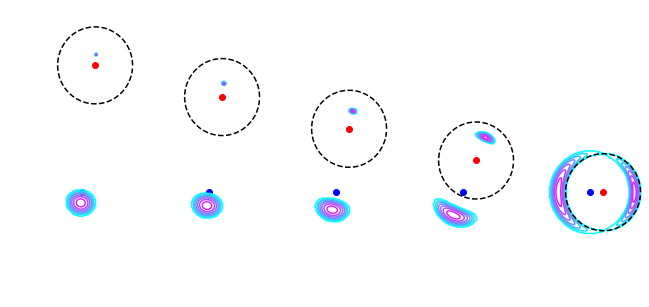

In [62]:
# code cell 6
# python code to produce Fig. 11 (microlensed images of a circular source)
# R. W. Schmidt 2020

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# lens equation
def deflect_ray(theta_1,theta_2):
    theta=np.sqrt((theta_1-mass_1)**2+(theta_2-mass_2)**2)
    alpha=einstein_radius**2/theta
    beta_1=theta_1-alpha*(theta_1-mass_1)/theta
    beta_2=theta_2-alpha*(theta_2-mass_2)/theta
    return np.sqrt(beta_1**2+beta_2**2) # returns separation from source centre

def source(theta):
    source_brightness=1-theta**2/source_size**2
    source_brightness[source_brightness<0]=0  # remove negative values
    return source_brightness

einstein_radius=0.85
window=4.13
source_size=0.3
mass_1=0.3

rays = np.arange(-window, window, 0.02)
xx, yy = np.meshgrid(rays, rays)            # coordinate mesh
phi=np.arange(0,2*np.pi,0.1)
critical_curve_1=einstein_radius*np.cos(phi)
critical_curve_2=einstein_radius*np.sin(phi)

plt.figure(figsize=(11.,5))
for i in range(5):
    mass_2=i*0.7
    image=source(deflect_ray(xx,yy))         # Schramm & Kayser (1987), A&A 174, 361
    plt.subplot(1,5,5-i)
    _=plt.axis('off')
    _=plt.contour(xx, yy, image, cmap=plt.cm.cool)
    plt.scatter(mass_1,mass_2,color='red')
    plt.scatter(0.0,0.0,color='blue')
    plt.plot(critical_curve_1+mass_1,critical_curve_2+mass_2,'--',color='black')
    plt.ylim(-2,4)
    plt.xlim(-1.2,1.2)


###### Fig. 11: The contours of the image of a circular source at the (projected) position of the blue marker is lensed by a point mass at the position of the red marker. In successive images the mass moves in projection closer to the source . The dashed curve indicates the Einstein radius of the point mass. The total number of images is two.

The magnification of a point source can be calculated by adding the magnifications of the two images.
One obtains the well-known formula

$$\mu_{total} = \frac{2 + u^2}{u \sqrt{u^2+4}}.~~(26)$$

In the following code cell these curves are plotted.

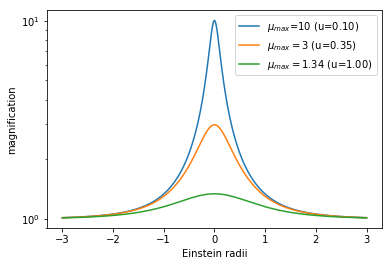

In [29]:
# code cell 7
# python code to produce Fig. 12 (magnification in one-star microlensing)
#
# R. W. Schmidt 2020
#
import numpy as np
import matplotlib.pyplot as plt

def mu(u):
    radius=np.sqrt(u*u+x*x)
    return (2+radius**2)/(radius*np.sqrt(radius**2+4))

x=np.linspace(-3,3,301)
plt.semilogy(x,mu(0.1),x,mu(0.35),x,mu(1))
plt.legend(['$\mu_{max}$=10 (u=0.10)','$\mu_{max}=3$ (u=0.35)','$\mu_{max}=1.34$ (u=1.00)'])
_=plt.xlabel('Einstein radii')
_=plt.ylabel('magnification')

Fig. 12: Magnification curve in single-mass microlensing (eq. 17) for different impact parameters $u$.

## 2.2 Microlensing in the galaxy

[Paczynski (1986)](https://ui.adsabs.harvard.edu/abs/1986ApJ...304....1P/abstract) suggested that the large number of potential lenses and sources in the bulge of the Milky way should make it possible to discover this type of lensing of stars by stars. This triggered a new kind of ambitious experiments, which monitored millions of stars in the bulge and the Magellanic clouds. Indeed, the OGLE and EROS team discovered the first such events in 1993. 

To estimate the number of expected events in the galaxy, one calculates a quantity called the optical depth $\tau$, which is the area covered by the Einstein radii of the individual stars:

$$\tau = \frac{1}{\delta \Omega} \int_0^{d_s} \underbrace{ \pi \left( \frac{4 G}{c^2} \frac{d_{ds}}{d_s d_d} 
\right) dM(d)}_{\rm =area~of~Einstein~circle~at~d}
= \int_0^{d_s} \frac{d \Sigma (d_d)}{\Sigma_{crit}}.$$

The last step can be seen with $dM = \delta \Omega d_d^2 d \Sigma$ and $\Sigma_{crit}=\frac{c^2 d_s}{4 \pi G d_d d_s}$. Using galaxy models that yield the mass density as a function of position, this expression can be evaluated. Rough estimates towards the centre of the galaxy yield $\tau \approx 10^{-6}$. This means that one in a million of background stars should be gravitationally lensed by a foreground object at any given time.

Importantly, this argument can also be used to constrain the galaxy density using microlensing observations. Recently, [Mroz et al. (2019)](https://ui.adsabs.harvard.edu/abs/2019ApJS..244...29M/abstract) have published the results on the optical depth and the event rate from eight years of observations of the OGLE project. Their analysis uses 8000 microlensing events with Einstein radius crossing times from a few days and up to 300 days with a maximum at $\approx 20$ days. Using a high-resolution map they find optical depths towards the bulge in the range of $0.2\times 10^{-6}$ to $4\times10^{-6}$ in $10'\times 10'$ pixels. Overall they find impressive agreement with the Besancon-model of the galaxy, which yields the optical depth as a function of galactic latitude towards the bulge.

## 2.3 Planetary microlensing

A famous application of the microlensing equations (e.g., eq. 14) is the lensing due to a small number of point masses. This encompasses binary star lensing and also lensing by stars with planetary companions. The convention is that planets are stellar companions with masses below 13 Jupiter masses:

$$m<= 13 M_{jup} = 13 \times 1.9\times 10^{27} kg = 2.5\times10^{28} kg \approx 1.2\times 10^{-2} M_{sun} ~~ (27)$$

(where $M_{jup}\approx 10^{-3} M_{sun}\approx 318 M_{earth}$).

[Mao & Paczynski (1991)](https://ui.adsabs.harvard.edu/abs/1991ApJ...374L..37M/abstract) discussed the lensing of low-mass companions and planets around host stars.
For such a model a source star with a given sizes moves along a linear trajectory behind the lens system. In the simplest case one can use the following parameters:

* mass ratio

* separation

* impact parameter

* track angle

* time of closest approach

* Einstein crossing time (determines the speed of the lens with respect to the source)

* source size

In Fig. 13a a few trajectories are plotted similar to those of [Mao & Paczynski 1991](https://ui.adsabs.harvard.edu/abs/1991ApJ...374L..37M/abstract) for the case of a mass ratio $q=0.1$ and $q=0.001$ (only trajectory B).
The corresponding light curves are plotted in Fig. 13b (for point sources). It can be seen that there are significant brightness maxima during caustic crossings. For larger sources the maxima become smeared out (see Fig. 6), but even planetary microlensing events are readily observable due to the characteristic deviations from the simple magnification curve for a single lens (Fig. 12).

There are several codes available now to model planetary microlensing. Very elaborate codes are [pyLIMA](https://github.com/ebachelet/pyLIMA) or [muLAn](https://github.com/muLAn-project/muLAn). The light curves shown here are calculated for point sources with [lightcurvefinder](https://github.com/rschmidthd/lightcurvefinder).

![Binary caustic with tracks](figures/binary_caustic.png)

![Binary light curves](figures/binary_light_curve.png)

###### Fig. 13a (top): Binary caustic with tracks. Green: $m_1=1 M_{sun}$, $m_2=0.1 M_{sun}$. Blue: $m_2=0.001 M_{sun}$. The planet is situated at the Einstein radius of the host star (to the right). Tracks chosen similar to [Mao & Paczynski (1991)](https://ui.adsabs.harvard.edu/abs/1991ApJ...374L..37M/abstract).  Fig. 13b (bottom): Light curves for points sources corresponding to tracks in Fig. 13a. Note Bp is track B with a companion mass of $0.001 M_{sun}$.

## 2.4 Examples of planetary microlensing events

For two point masses with a mass ratio $q$, there are overall three geometries of the caustic lines: "close", "intermediate" and "wide". These are depicted in Fig. 14. The "close" geometry consists of three different caustic three structures, the "wide" geometry of two, and the "intermediate" geometry of one. One can move from one geometry regime to the other by changing the separation of the two point masses. Alternatively, it is also possible to move from "close" to "intermediate" or "intermediate" to "wide" by changing the mass ratio.

![Caustic parameter space](figures/different_caustics.png)

###### Fig. 14: Three different types of caustic regime in binary microlensing. The central star is situated where the red, the blue and the green caustics meet. The companion is in each case beyond the location of the second green caustic to the right. See also  [Cassan (2008)](https://ui.adsabs.harvard.edu/abs/2008A%26A...491..587C/abstract).

Let us look at a few examples of published planetary microlensing events. They illustrate the wide variety of possible light curves, and the complicated parameter space that must be searched by the modellers.

1. The first planet-event that was found was published by [Bond et al. (2004)](https://ui.adsabs.harvard.edu/abs/2004ApJ...606L.155B/abstract). In Fig. 15 you can see in the initial brightness rise a distinct feature that is due to two caustic crossings of the source.  The monitoring by Bond et al. (OGLE and MOA teams) noticed a deviation from the standard single-mass magnitude curve and monitored this event with frequent observations so that the second caustic crossing and the rest of the event were very well covered. The second caustic crossing and the rest of the event were well covered with  frequent observations. The "caustic exit" happend on 2003 July 21.
The host star is situated at the origin of the coordinate system. 
The separation of planet and star are 3 AU. The planet mass was estimated as $1.5 M_{jup}$ (this estimation assumes a main sequence host star). The caustic pattern is of _intermediate_ type.

![Bond et al event 2004](figures/bond_event.png)

###### Fig. 15: Caustic patter and light curve similar to the event observed by Bond et al. (2004). Note the light curve has been calculated for a point source. The direction of the source on the track in the left panel is towards the lower left. The host stars is at the centre, the planet to the right.

2. [Beaulieu et al. (2006)](https://ui.adsabs.harvard.edu/abs/2006Natur.439..437B/abstract) discovered a __low-mass planet__ when monitoring a microlensing event discovered by the OGLE team in 2005. In fact, the light curve was quite similar to the standard single-mass light curve, when after the maximum suddenly a (small) deviation from the source was found. The point source model in Fig. 16 show a potentially huge deviation from the single-mass curve. However, the source star actually is a giant, so that the deviation feature was smoothed out very much (see their paper). The deviation lasted for about half a day and was closely observed by telescopes in La Silla (Chile), Perth (Australia) and by the MOA team (New Zealand).
Beaulieu et al. were able to determine model parameters where planet and host star are 2.6 AU apart. The mass of the planet was estimated as ${\bf 5.5 M_{earth}}$, orbiting around an M dwarf with a mass $0.22 M_{sun}$. The caustic pattern is of the _wide_ type.



![Beaulieu event](figures/beaulieu_event.png)

###### Fig. 16: Caustic pattern (with source track) and microlensing light curve similar to the event observed by Beaulieu et al. (2006). The light curve has been calculated for a point source. To simulate the effect of source size, the orange curve was smoothed with a box filter width of 0.07 Einstein radius. The direction of the source on the track in the left panel is towards the upper right. The host stars is at the centre, the planet to the right.

3. The third event I would like to discuss is the one by [Han et al. (2013)](https://ui.adsabs.harvard.edu/abs/2013ApJ...762L..28H/abstract) discovered by the OGLE and the $\mu$FUN collaboration. They discovered a __two-planet system__. Although their data do not allow to decide on one single best solution, their favourite solutions are quite similar to the light curve shown in Fig. 17. The complicated caustic structure due to the three point masses (more detail in the inset) leads to three magnification bumps, all of which are broadened in the data by the brightness profile of the main sequence source star (compare their paper). One planet with $0.11 M_{jup}$ is situated $\approx 1$ Einstein radius (3.8 AU) to the right of the host star ($0.82 M_{sun}$) at the centre of the coordinate system. The second (more massive) planet with $0.68 M_{jup}$ is $\approx 1.3$ Einstein radii (4.6 AU) to the upper left. 
The caustic structure for this event is an interesting combination of a _wide_ (asteroid and slanted triangular caustic) and a _close_ type (caustic pair and horizontal triangular), for which the two structures on the right are connected.

![Han event](figures/han_event.png)

###### Fig. 17: Caustic pattern (with source track) and microlensing light curve similar to the event observed by Han et al. (2013). The light curve has been calculated for a point source. To simulate the effect of the source size, the orange curve was smoothed with a box filter width of 0.0025 Einstein radii. The direction of the source on th etrack in the left panel is towards the lower right.

All three solutions are  impressive fits to the data presented. It should be noted how difficult it is to find these solutions, given the enormous parameters space -- especially for two mass ratios. In practise, this is done by running microlensing codes over larger grids of the parameter space, with detailed fine-tuning once acceptable solutions are found in the grids.

In these examples, none of the planets are actually very close to the host star. Planetary microlensing is sensitive to perturbations of the Einstein ring of the host star (Fig. 13). Planets situated there have a strong effect on the light curve of background stars. 

Thus, planetary microlensing has come to be known as a technique to find planets a certain distance away from their host stars. This is in contrast to other planet-finding techniques (Doppler wobble, transit) where the effects are stronger if the planet is closer to the star. A fascinating perspective of the planetary microlensing effect thus is to find planets further out in the extra-solar systems, where conditions may be more habitable than closer to the host star.

Of course, it should also be said, that in our example the planets are kilo-parsecs away towards the centre of bulge and still out of reach even for wild imaginations of the current development of space travel.

Acknowledgements
=================

I thank the organizers for an enjoyable and interesting conference.
I thank Markus Hundertmark for discussions on microlensing and for helping
me to choose planetary microlensing events to discuss in the talk.


Bibliography
===========

[only literature is listed that was not directly linked to the NASA ADS above]

Alpay, A., 2018, Master thesis, University of Heidelberg, Link to the code: https://github.com/illuhad/teralens

Frank, J., King, A., Raine, D.,  2002, "Accretion Power in Astrophysics", 3rd edition, Cambridge University Press, Cambridge, UK

Kochanek, C. S., 2006, in P. Schneider, C. Kochanek, J. Wambsganss: "Gravitational Lensing: Strong, Weak and Micro", eds. G. Meyan, P. North, P. Jetzer, Springer, Heidelberg

Zimmer, F., 2009, Diploma thesis, University of Heidelberg